In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load Dataset
file_path = "/content/suspicious Bangla text.xlsx"
df = pd.read_excel(file_path)

# Show dataset overview
print("Dataset Shape:", df.shape)
print("First 5 rows:")
print(df.head())

Dataset Shape: (43389, 2)
First 5 rows:
                                                Text  binary_label
0  ১ থেকে ১০০ এর মধ্যে আপনার প্রিয় নম্বর কি? এর উ...             0
1  ওএমজি ওএমজি ওএমজি হ্যাঁ হ্যাঁ এটি ... এটি নিখু...             0
2  এই ছুটির দিনটি একটি বোর্ডে পেরেক করা একজনকে উদ...             1
3  সেই রাজাকার বাহিনী আর জঙ্গী বাহিনী বঙ্গবন্ধু ক...             1
4  হ্যাঁ আমি বালিশগুলি লাইভ জার্নাল জারক রোটেশনগু...             1


In [ ]:
# Extract text and labels
texts = df["Text"].astype(str).values
labels = df["binary_label"].values

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42, stratify=labels)

# Tokenization
max_words = 10000  # Max words to consider
max_len = 100  # Max sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding="post", truncating="post")
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding="post", truncating="post")

# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 79s 69ms/step - accuracy: 0.6614 - loss: 0.5781 - val_accuracy: 0.8149 - val_loss: 0.3939
Epoch 2/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.8822 - loss: 0.2845 - val_accuracy: 0.8531 - val_loss: 0.3654
Epoch 3/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.9561 - loss: 0.1207 - val_accuracy: 0.8687 - val_loss: 0.4103
Epoch 4/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 81s 68ms/step - accuracy: 0.9810 - loss: 0.0551 - val_accuracy: 0.8570 - val_loss: 0.6183
Epoch 5/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 85s 71ms/step - accuracy: 0.9870 - loss: 0.0375 - val_accuracy: 0.8711 - val_loss: 0.6539
Epoch 6/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 79s 69ms/step - accuracy: 0.9918 - loss: 0.0255 - val_accuracy: 0.8661 - val_loss: 0.8204
Epoch 7/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 88s 75ms/step - accuracy: 0.9909 - loss: 0.0256 - val_accuracy: 0.8637 - val_loss: 0.8809
Epoch 8/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 79s 72ms/step - accuracy: 0.9920 -

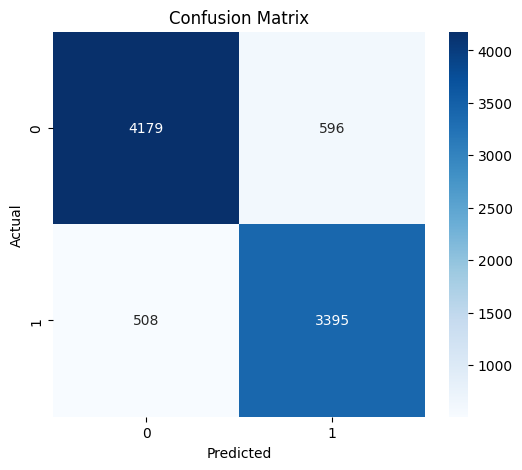

In [ ]:
# CNN Model for Text Classification
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluate model
y_pred_probs = model.predict(X_test_padded)
y_pred = (y_pred_probs > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save Model
model.save("cnn_text_classifier.h5")
